In [1]:
%matplotlib inline
import os, pickle, string
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from statannotations.Annotator import Annotator

font_path = "/home/zhoujb/local/font/Times New Roman.ttf"
mpl.font_manager.fontManager.addfont(font_path)
prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = prop.get_name()
mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['pdf.fonttype'] = 42

RAW_PATH = "/data2/zhoujb/project/cowpea_project/rawData/"
SNP_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/snpDir/"
CLUSTER_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/SNPMMSeqCluster/"
RES_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Result/"
FIG_PATH = "/data2/zhoujb/project/cowpea_project/basedXPXLR/plotFigure/"

In [2]:
raw_f1_data = pd.read_excel(os.path.join(RAW_PATH, "cowpea_F1_data.xlsx"), sheet_name="Sheet1")
raw_f1_data[["GZ_P1", "GZ_P2"]] = raw_f1_data["编号"].str.split("*", expand=True)
raw_f1_data["GZ_P1"] = "D" + raw_f1_data["GZ_P1"]
raw_f1_data["GZ_P2"] = "D" + raw_f1_data["GZ_P2"]

raw_map = pd.read_excel(os.path.join(RAW_PATH, "cowpea_F1_data.xlsx"), sheet_name="Sheet2")
raw_map_d = raw_map.set_index("广州播种编号").to_dict()["杭州播种编号"]

raw_f1_data["HZ_P1"] = raw_f1_data["GZ_P1"].map(raw_map_d)
raw_f1_data["HZ_P2"] = raw_f1_data["GZ_P2"].map(raw_map_d)

for index in raw_f1_data.index:
    hz_p1 = raw_f1_data.loc[index, "HZ_P1"]
    hz_p2 = raw_f1_data.loc[index, "HZ_P2"]
    
    cross_res_path = "/data2/zhoujb/project/cowpea_project/basedXPXLR/Cross_Analysis_Results/CrossRes/"
    tmp_file = pd.read_table(os.path.join(cross_res_path, "{}.cross.res".format(hz_p1)))
    raw_f1_data.loc[index, "Optimal_score"] = tmp_file[tmp_file["P2"]==hz_p2]["Optimal_score"].values[0]
    raw_f1_data.loc[index, "Delta_score"] = tmp_file[tmp_file["P2"]==hz_p2]["Delta_score"].values[0]

raw_f1_data = raw_f1_data.rename(columns={'荚长':"PL", '可溶性糖含量':"PSugar", '纤维素含量':"PC", '淀粉含量':"PStarch"})
raw_f1_data["Name"] = raw_f1_data["HZ_P1"] + "×" + raw_f1_data["HZ_P2"]
raw_f1_data["Log_Delta_score"] = np.log2(raw_f1_data["Delta_score"])
raw_f1_data = raw_f1_data.sort_values(by="Delta_score")

raw_f1_data.to_excel("./cowpea_f1_data.xlsx", index=0)

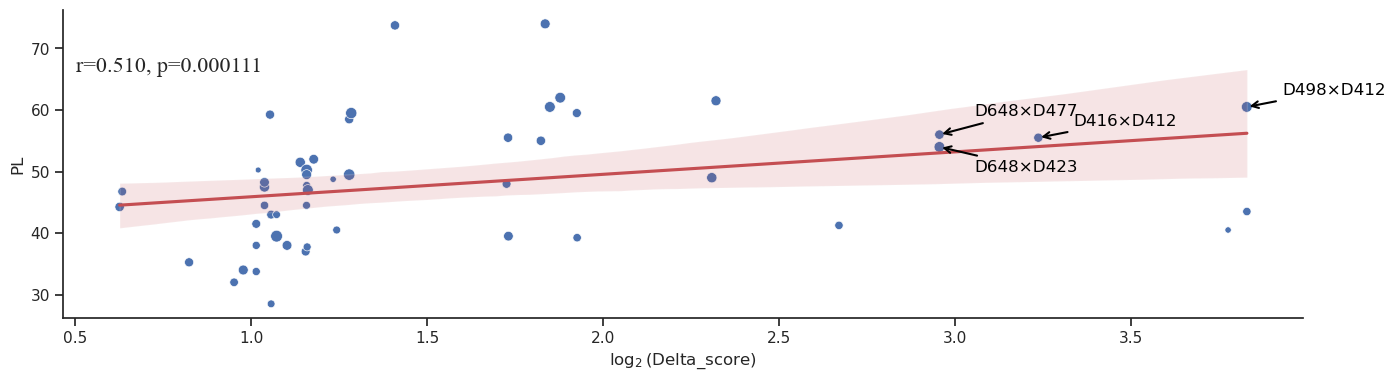

In [3]:
sns.set(font_scale=1, style="ticks")
fig = plt.figure(figsize=(16, 4))

g = sns.scatterplot(data=raw_f1_data, x='Log_Delta_score', y='PL', size="PSugar", legend=False)
sns.regplot(x="Log_Delta_score", y="PL", data=raw_f1_data, 
                ax=g, ci=95, order=0, scatter=False, color="r")

r, pvalue = stats.spearmanr(raw_f1_data["Delta_score"].values, raw_f1_data["PL"].values, nan_policy="omit")
anno_label = 'r={:.3f}, p={:.3g}'.format(r, pvalue)
g.text(.01, .8, anno_label, transform=g.transAxes, font_properties=prop, fontsize=16)

plt.annotate(
    raw_f1_data.loc[36, "Name"],
    xy=(raw_f1_data.loc[36, "Log_Delta_score"], raw_f1_data.loc[36, "PL"]),
    xytext=(raw_f1_data.loc[36, "Log_Delta_score"] + 0.1, raw_f1_data.loc[36, "PL"] + 2),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    fontsize=12,
    color='black'
)

plt.annotate(
    raw_f1_data.loc[9, "Name"],
    xy=(raw_f1_data.loc[9, "Log_Delta_score"], raw_f1_data.loc[9, "PL"]),
    xytext=(raw_f1_data.loc[9, "Log_Delta_score"] + 0.1, raw_f1_data.loc[9, "PL"] + 2),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    fontsize=12,
    color='black'
)

anno_number = 50
plt.annotate(
    raw_f1_data.loc[anno_number, "Name"],
    xy=(raw_f1_data.loc[anno_number, "Log_Delta_score"], raw_f1_data.loc[anno_number, "PL"]),
    xytext=(raw_f1_data.loc[anno_number, "Log_Delta_score"] + 0.1, raw_f1_data.loc[anno_number, "PL"] - 4),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    fontsize=12,
    color='black'
)

anno_number = 51
plt.annotate(
    raw_f1_data.loc[anno_number, "Name"],
    xy=(raw_f1_data.loc[anno_number, "Log_Delta_score"], raw_f1_data.loc[anno_number, "PL"]),
    xytext=(raw_f1_data.loc[anno_number, "Log_Delta_score"] + 0.1, raw_f1_data.loc[anno_number, "PL"] + 3),
    arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
    fontsize=12,
    color='black'
)

g.spines.right.set_visible(False)
g.spines.top.set_visible(False)

g.set(xlabel=r'$\log_{2}$(Delta_score)')

def letter_annotation(ax, xoffset, yoffset, letter):

    mpl.rcParams['font.family'] = prop.get_name()
    mpl.rcParams['font.sans-serif'] = ["Times New Roman"]
    ax.text(xoffset, yoffset, letter, transform=ax.transAxes,
            size=20, weight='bold')

#letter_annotation(g, -0.04, 1., "K")

plt.savefig(os.path.join(FIG_PATH, 'Fig_2k_f1_corr.pdf'), format='pdf', bbox_inches='tight', transparent=True)